# 实验一 · Lab 1 · 插入排序与归并排序的实验性能比较

## 需求分析

- 输入：规模为n的测试集（列表，n分别取10k,20k,30k,40k,50k）
- 输出：排序过后的顺序集，以及不同规模下、不同排序方法的消耗时间
- 程序功能：
    + 针对每一个输入规模n，随机产生10组测试样本，统计两种不同排序算法在10个样本上的平均运行时间；画出这两种不同排序算法在10个随机样本的平均运行时间与输入规模n的关系
    + 画出理论效率分析的曲线和实测的效率曲线
- 测试集：由于取特定值的操作时间复杂度在同一数据结构中保持一致，在对不同数据结构进行排序操作通常不考虑取值时间。则为方便测试，本实验测试集均为整数（int）

## 详细设计与实验

### 插入排序与归并排序 函数实现（python）


In [1]:

# @param    arr     需要排序的序列数组
# @param    start   排序序列的初始index，一般为0
# @param    end     排序序列的结尾index，注意不是数组长度
def sort_insertion(arr,start,end): # 插入排序算法
    for j in range(start+1,end+1):
        key = arr[j]
        i = j - 1
        while (i >= 0) and (arr[i] > key):
            arr[i+1] = arr[i]
            i -= 1
        arr[i+1] = key


# @param    arr     需要合并的序列数组
# @param    p       合并序列的初始index，一般为0
# @param    q       合并序列的中间index
# @param    r       合并序列的末尾index
def merge(arr,p,q,r):   # 归并函数（加入哨兵，简化代码）
    leftArr = arr[p:q+1]
    rightArr = arr[q+1:r+1]

    leftArr.append(float('inf'))
    rightArr.append(float('inf'))

    i = 0
    j = 0
    for k in range(p,r+1):
        if leftArr[i] <= rightArr[j]:
            arr[k] = leftArr[i]
            i += 1
        else:
            arr[k] = rightArr[j]
            j += 1


# @param    arr     需要排序的序列数组
# @param    p       排序序列的初始index，一般为0
# @param    r       排序序列的结尾index，注意不是数组长度
def sort_merge(arr,p,r):    # 归并排序算法
    if p < r:
        q = (p+r)//2
        sort_merge(arr,p,q)
        sort_merge(arr,q+1,r)
        merge(arr,p,q,r)
    else:
        return

### 时间效率分析

#### 插入排序

插入排序的基本操作是将一个元素插入到已经排好序的部分中，这一操作的时间复杂度取决于已排好序部分的长度，即插入位置的前面有多少个元素需要比较和移动。

假设要排序的序列长度为 n，那么在最坏情况下，每次插入操作都需要比较和移动整个已排序序列，因此第 i 个元素的插入操作时间复杂度为 i，总的时间复杂度为：

$$T(n) = 1 + 2 + 3 + ... + n-1
= \frac{n(n-1)}{2}
= O(n^{2})$$


#### 归并排序

归并分为两个步骤。首先是分治，将大序列分成数个不可分的元素。这个过程时间复杂度为 $$O(\log_2n)$$，n为序列规模。
而第二个步骤为合并(merge)，它是完整遍历整个序列，因此时间复杂度为 $$O(n)$$。

两者组合，时间复杂度相乘，则总的时间复杂度为：
$$n \cdot \log_2n$$

### 生成不同规模随机整数测试集 函数实现

In [2]:
import random

MAX_INT_NUMBER = 100000     # 随机数范围，暂定从0~10w

# @param n      测试集规模，生成n个随机数列表

def generateTestSet_Int(n):
    list = []
    i = 0
    while i < n:
        list.append(random.randint(0,MAX_INT_NUMBER))
        i += 1
    return list


### 计算运行时间并返回10次结果平均值 函数实现

In [3]:
import time

# @param fun    具体排序函数指针
# @param n      测试集规模 如1e4->10000
# @param k      计算次数，用于求平均值

def returnCalculateRes_avg(fun, n, k):
    sum = 0
    i = 0
    while i < k:
        list = generateTestSet_Int(n)
        t1 = time.perf_counter_ns()
        fun(list,0,len(list)-1)
        t2 = time.perf_counter_ns()
        sum += (t2 - t1)/1e6
        i += 1
    return sum/k



In [ ]:
print(returnCalculateRes_avg(sort_merge,200000,1))

### 主体运行代码

In [5]:
import pandas as pd

list1 = []
list2 = []
for i in range(1,6):
    list1.append(returnCalculateRes_avg(sort_insertion,i*1e4,10))
    list2.append(returnCalculateRes_avg(sort_merge,i*1e4,10))

dic = {
    "scale":[1e4,2e4,3e4,4e4,5e4],
    "insertion":list1,
    "merge":list2
}

In [6]:
getSecond = lambda x : x / 1e3 # 从微秒ms转换为秒s


dic["insertion"] = [getSecond(i) for i in list1]
dic["merge"] = [getSecond(i) for i in list2]


### 科学绘图（pandas plot）

<AxesSubplot: xlabel='scale'>

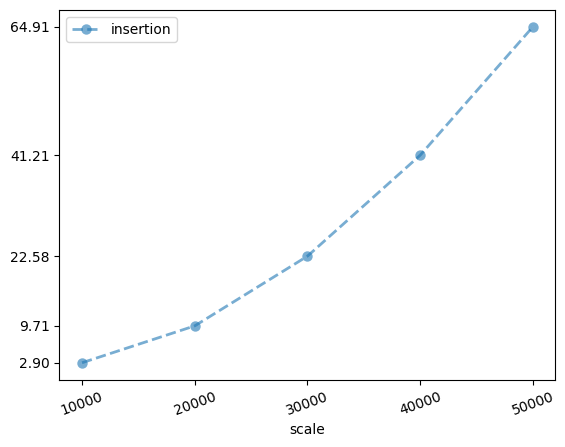

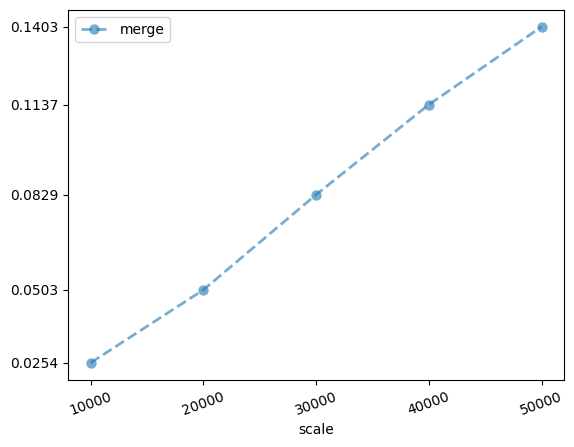

In [7]:
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(dic)
df_insertion = pd.DataFrame(df,columns=['scale','insertion'])
df_merge = pd.DataFrame(df,columns=['scale','merge'])


df_insertion.set_index('scale', inplace = True)
df_merge.set_index('scale', inplace = True)

df_insertion.plot(rot=20,alpha=0.6,linestyle='--',linewidth=2,marker='.'
            ,markersize='5',markeredgewidth=5
            ,yticks=pd.Series(dic['insertion'], copy=False),xticks=pd.Series(dic['scale'], copy=False))
df_merge.plot(rot=20,alpha=0.6,linestyle='--',linewidth=2,marker='.'
            ,markersize='5',markeredgewidth=5
            ,yticks=pd.Series(dic['merge'], copy=False),xticks=pd.Series(dic['scale'], copy=False))

### 理论时间转换公式推导

#### 插入排序


假定1*10^4规模下的运行时间为基准，设为t1，规模为n1 = 10^4。
$$t_{1} = n_{1}^{2} \cdot t$$
。则n2规模下，
$$t_{2}=n_{2}^{2} \cdot t = (\frac{n_{2}}{n_{1}}) ^ {2} \cdot t_{1}$$
t1 为实践所得，已知。而
$$n2 =  {k \cdot 10^{4},k \in (1,2,3,4,5)}$$


#### 归并排序


假定1*10^4规模下的运行时间为基准，设为t1，规模为n1 = 10^4。
$$t_{1} = n_{1} \cdot \log_2{n_{1}} \cdot t$$
。则n2规模下，
$$t_{2}=n_{2} \cdot \log_2{n_{2}} \cdot t = (\frac{n_{2}}{n_{1}}) \times (\frac{\log_2{n_{2}}}{\log_2{n_{1}}}) \cdot t_{1} = (\frac{n_{2}}{n_{1}}) \times (\log_{n_{1}}{n_{2}}) \cdot t_{1}$$
t1 为实践所得，已知。而
$$n2 =  {k \cdot 10^{4},k \in (1,2,3,4,5)}$$


### 计算理论时间 函数实现

In [8]:
import math

def calculateTheoryTime_insertion(t,kArr):
    arr = []
    for i in kArr:
        res = math.pow(i/kArr[0],2) * t
        arr.append(res)
    return arr

def calculateTheoryTime_merge(t,kArr):
    arr = []
    for i in kArr:
        res = i/kArr[0] * math.log(i,kArr[0]) * t
        arr.append(res)
    return arr


### 理论与实践时间对比·科学绘图

<AxesSubplot: title={'center': 'Merge Sort'}, xlabel='scale'>

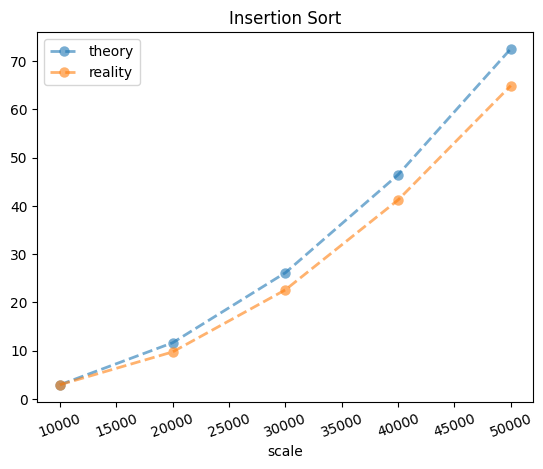

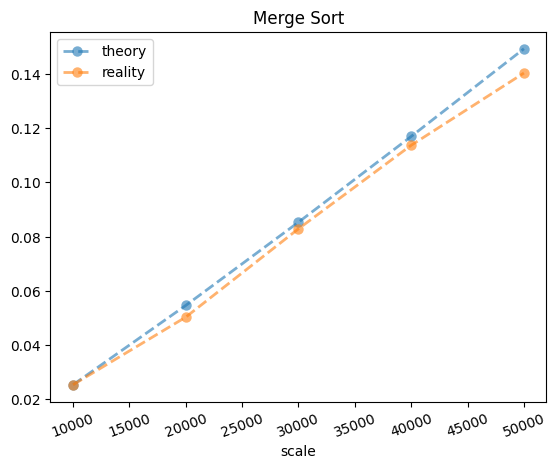

In [9]:
theoryTime_insertion = calculateTheoryTime_insertion(dic['insertion'][0],dic['scale'])

theoryTime_merge = calculateTheoryTime_merge(dic['merge'][0],dic['scale'])

dic_cmp_insertion = {
    'scale':dic['scale'],
    'theory':theoryTime_insertion,
    'reality':dic['insertion']
}

dic_cmp_merge = {
    'scale':dic['scale'],
    'theory':theoryTime_merge,
    'reality':dic['merge']
}

df_cmp_insertion = pd.DataFrame.from_dict(dic_cmp_insertion)
df_cmp_merge = pd.DataFrame.from_dict(dic_cmp_merge)


df_cmp_insertion.set_index('scale', inplace = True)
df_cmp_merge.set_index('scale', inplace = True)

df_cmp_insertion.plot(rot=20,alpha=0.6,linestyle='--',linewidth=2,marker='.'
            ,markersize='5',markeredgewidth=5
            ,title='Insertion Sort')

df_cmp_merge.plot(rot=20,alpha=0.6,linestyle='--',linewidth=2,marker='.'
            ,markersize='5',markeredgewidth=5
            ,title='Merge Sort')

### 分析
观察理论与实践的时间对比。归并排序与插入排序的两条曲线几近相等。

但是整体上，理论却偏高于实际用时。

通过探讨分析研究，我认为，出现如上现象的原因是python在做大量重复性数据操纵时，进行了优化。使得在规模越大时，时间却比以1万规模为基准的用时少。

### 运行代码截图

https://github.com/yuxiio/ItA_lab.git 代码仓库地址


ps. 23分钟用时（python真的慢...我用的还是3.11版本，官方誉为最快的一代python...）
![如图所示](./1.png)

## 调试过程中遇到的问题

1. 归并忘了咋写，看了看课本CLRS，又想起来了，还学会了哨兵写法。
2. python运行太慢，没办法解决，只能挂着运行。
3. pandas好久不用忘了咋写，看了看教程，复习了一下画图
4. 之前跑的一遍实验用时40分钟，插入排序规模5万时理论值与实际值相差甚大，（正常为60秒多，那一次却平均用时160秒）不懂原因。想了好久，查阅各种资料，询问chatGPT，勉强得出一个结论：挂后台运行时电脑息屏，导致CPU输出功率下降，使得运算时间大量上升。
5. jupyter 导出为中文pdf很麻烦，调试了好久，才勉强弄出一版。

## 总结分析

插入排序与归并排序的性能果真天差地别。无论是从时间复杂度公式来看，还是运行实践结果来看，归并排序的速度远高与插入排序，而且也同时具备稳定的效果。


但是归并排序是利用递归处理，递归调用需要一定的栈空间来保存函数调用的上下文信息，如果递归的深度过大，栈空间可能会不足导致栈溢出。此外，递归调用还需要在每次函数调用时保存一些状态信息，也会占用额外的空间。


本次实验，我进一步学会了用jupyter notebook来进行科学运算探究。发现python写起来确实简单易懂，但是通过实验探究，发现python的运行效率确实低下（相较于Java，C系）。（但是运行时间长从另外一个角度看，可能并不是一件坏事，在它漫长的运行时间中，可以摸鱼喝茶等待，减少内卷，解放程序员...）